<a href="https://colab.research.google.com/github/iceteahh/ML-FinalProject/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Rea Data

In [0]:
data = pd.read_csv('gdrive/My Drive/MachineLearning/FinalProject/elt_price_lead_4300.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 22 columns):
ad_id              4387 non-null int64
list_id            4387 non-null int64
subject            4387 non-null object
body               4373 non-null object
orig_list_time     4387 non-null object
price              4386 non-null float64
mobile_model       4387 non-null int64
region_v2          4376 non-null float64
area               4387 non-null int64
area_v2            4376 non-null float64
condition_ad       3270 non-null float64
elt_condition      4386 non-null float64
mobile_capacity    4310 non-null float64
mobile_color       4387 non-null int64
mobile_type        4387 non-null int64
elt_warranty       1196 non-null float64
ward               3315 non-null float64
mobile_brand       4387 non-null int64
giveaway           1360 non-null float64
elt_lock           63 non-null float64
listing_adviews    4375 non-null float64
listing_leads      4375 non-null float64
dtypes: fl

In [5]:
data.head()

,ad_id,list_id,subject,body,orig_list_time,price,mobile_model,region_v2,area,area_v2,...,mobile_capacity,mobile_color,mobile_type,elt_warranty,ward,mobile_brand,giveaway,elt_lock,listing_adviews,listing_leads
0,72361917,48884773,Oppo F1s giao lưu đt 2 sim cao hơn bù tiền,Cần giao lưu oppo F1s chính hãng hết bảo hành ...,2018-08-01 12:11:32,2200000.0,118,13000.0,102,13102.0,...,4.0,7,1,NaN,NaN,11,0.0,NaN,59.0,25.0
1,72375233,48894232,Nokia 8 Bh 3/2019 ( Fix tẹt ga trong hôm nay),Em cần bán e nokia 8 máy đẹp và chính hãng nhé...,2018-08-01 15:58:55,6000000.0,113,13000.0,112,13112.0,...,5.0,6,1,NaN,NaN,10,NaN,NaN,33.0,4.0
2,72385652,48902681,Iphone 7 plus,máy quốc tế nhé. zin từ trong ra ngoài . Bao ...,2018-08-01 20:55:39,9600000.0,12,13000.0,113,13113.0,...,4.0,7,1,NaN,NaN,1,0.0,NaN,190.0,14.0
3,72395136,48909454,iphong 6s 64gb qtế zin 98% có giao lưu,dư sài cần bán hoạc giao lưu iphone 6s 64gb bả...,2018-08-02 09:01:37,5150000.0,9,13000.0,117,13117.0,...,5.0,3,1,NaN,NaN,1,NaN,NaN,36.0,0.0
4,72410071,48920286,Xiaomi redmi s2 máy đẹp như mới bảo hành lâu,Máy đẹp như mới. Nguyên hộp còn bảo hành lâu,2018-08-02 13:02:27,3000000.0,160,13000.0,97,13097.0,...,4.0,4,1,2.0,NaN,15,0.0,NaN,42.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 22 columns):
ad_id              4387 non-null int64
list_id            4387 non-null int64
subject            4387 non-null object
body               4373 non-null object
orig_list_time     4387 non-null object
price              4386 non-null float64
mobile_model       4387 non-null int64
region_v2          4376 non-null float64
area               4387 non-null int64
area_v2            4376 non-null float64
condition_ad       3270 non-null float64
elt_condition      4386 non-null float64
mobile_capacity    4310 non-null float64
mobile_color       4387 non-null int64
mobile_type        4387 non-null int64
elt_warranty       1196 non-null float64
ward               3315 non-null float64
mobile_brand       4387 non-null int64
giveaway           1360 non-null float64
elt_lock           63 non-null float64
listing_adviews    4375 non-null float64
listing_leads      4375 non-null float64
dtypes: fl

In [0]:
data_sorted = data.sort_values(['listing_adviews'], ascending=0)

In [8]:
data_sorted.head(40)

,ad_id,list_id,subject,body,orig_list_time,price,mobile_model,region_v2,area,area_v2,...,mobile_capacity,mobile_color,mobile_type,elt_warranty,ward,mobile_brand,giveaway,elt_lock,listing_adviews,listing_leads
3868,79330364,54012860,Iphone 6 plus 64 Gb mất nguồn,Iphone 6 plus 64gb Quốc tế mất nguồn. Thợ báo...,2019-01-04 19:56:51,1200000.0,8,13000.0,104,13104.0,...,3.0,3,1,NaN,NaN,1,NaN,NaN,680.0,26.0
1822,75104302,50871815,iphone x bạc tgdđ còn bhanh công ty,mình muốn sang nhanh iphone x màu bạc chuẩn ch...,2018-10-02 20:38:52,16400000.0,213,13000.0,114,13114.0,...,5.0,3,1,NaN,9243.0,1,NaN,NaN,625.0,39.0
3429,77921018,52932610,Galaxy S7 Edge Android 6.,máy nguyên zin nứt kính sọc như hình .mây bao ...,2018-12-02 21:17:37,1900000.0,43,13000.0,101,13101.0,...,4.0,1,1,NaN,9436.0,2,0.0,NaN,599.0,12.0
4000,80305512,54760158,iPhone 6 Đen bán gấp về quê,Máy bị mất vân tay. K sử dụng được vân tay. Co...,2019-01-31 07:59:48,1800000.0,7,13000.0,110,13110.0,...,3.0,1,1,NaN,9268.0,1,NaN,NaN,591.0,78.0
1205,74932513,50745674,"iPhone 6s bảo hành thế giới đi động,mới 99%","Nhu cầu lên máy 8 nên bán lại cây 6s ,64gb,màu...",2018-09-28 21:55:27,4500000.0,9,13000.0,110,13110.0,...,5.0,7,1,2.0,9276.0,1,NaN,NaN,585.0,108.0
2770,78018948,53006470,iPhone 5s iCloud,Bán xác dính iCloud h bị như hình màn hình ngu...,2018-12-04 22:12:25,500000.0,6,13000.0,117,13117.0,...,3.0,1,1,NaN,9505.0,1,NaN,NaN,563.0,14.0
1648,74664544,50553261,Anh chị nào thích vớt em này đi nha,"Máy mới, phụ kiện ốp lưng đầy đủ ạ. Máy bảo hà...",2018-09-23 01:11:08,1950000.0,218,13000.0,108,13108.0,...,4.0,7,1,2.0,9456.0,2,0.0,NaN,547.0,23.0
3651,78705304,53528258,iPhone 6 plus Đen,Cần bán iphone 6 plus màu đen 16gb.máy hiện tạ...,2018-12-20 14:55:14,2000000.0,8,13000.0,110,13110.0,...,3.0,1,1,NaN,9270.0,1,NaN,NaN,538.0,55.0
3664,79846325,54406651,Dọn nhà,"Dọn nhà dư ra cái dt ip 4 16gb,máy còn đang sử...",2019-01-16 20:52:57,420000.0,2,13000.0,112,13112.0,...,3.0,1,1,NaN,9301.0,1,NaN,NaN,519.0,17.0
712,74019890,50091545,Iphone x 256g zinall 99%,Bên em về dc ít cây iphone x 256g lock bán cho...,2018-09-08 20:02:13,15500000.0,213,13000.0,113,13113.0,...,7.0,1,1,2.0,NaN,1,NaN,2.0,491.0,16.0


# Reshape Data

In [0]:
data = data.drop(columns=['ad_id', 'list_id', 'listing_leads', 'body', 'region_v2', 'area_v2', 'mobile_color', 'giveaway', 'ward'])

**Handle datetime**

https://www.researchgate.net/post/How_to_append_TF-IDF_vector_into_pandas_dataframe

In [0]:
data['orig_list_time'] = pd.to_datetime(data['orig_list_time'], errors='coerce')
data['day_of_week'] = data['orig_list_time'].dt.dayofweek
data['hour'] = data['orig_list_time'].dt.hour
data = data.drop(columns=['orig_list_time'])

In [11]:
data.head()

,subject,price,mobile_model,area,condition_ad,elt_condition,mobile_capacity,mobile_type,elt_warranty,mobile_brand,elt_lock,listing_adviews,day_of_week,hour
0,Oppo F1s giao lưu đt 2 sim cao hơn bù tiền,2200000.0,118,102,1.0,2.0,4.0,1,NaN,11,NaN,59.0,2,12
1,Nokia 8 Bh 3/2019 ( Fix tẹt ga trong hôm nay),6000000.0,113,112,1.0,2.0,5.0,1,NaN,10,NaN,33.0,2,15
2,Iphone 7 plus,9600000.0,12,113,1.0,2.0,4.0,1,NaN,1,NaN,190.0,2,20
3,iphong 6s 64gb qtế zin 98% có giao lưu,5150000.0,9,117,1.0,2.0,5.0,1,NaN,1,NaN,36.0,3,9
4,Xiaomi redmi s2 máy đẹp như mới bảo hành lâu,3000000.0,160,97,NaN,2.0,4.0,1,2.0,15,NaN,42.0,3,13


**Handle NAN**

In [12]:
data.isna().any()

subject            False
price               True
mobile_model       False
area               False
condition_ad        True
elt_condition       True
mobile_capacity     True
mobile_type        False
elt_warranty        True
mobile_brand       False
elt_lock            True
listing_adviews     True
day_of_week        False
hour               False
dtype: bool

In [0]:
data['price'] = data['price'].fillna(0)
data['mobile_model'] = data['mobile_model'].fillna(0)
data['condition_ad'] = data['condition_ad'].fillna(0)
data['listing_adviews'] = data['listing_adviews'].fillna(0)
data['mobile_capacity'] = data['mobile_capacity'].fillna(0)
data['mobile_brand'] = data['mobile_brand'].fillna(0)
data['subject'] = data['subject'].fillna('')
#data['ward'] = data['ward'].fillna(0)
data['elt_warranty'] = data['elt_warranty'].fillna(0)
data['elt_lock'] = data['elt_lock'].fillna(0)
data['mobile_type'] = data['mobile_type'].fillna(0)
data['elt_condition'] = data['elt_condition'].fillna(0)
data = data[data['price'] != 0]

In [14]:
data.isna().any()

subject            False
price              False
mobile_model       False
area               False
condition_ad       False
elt_condition      False
mobile_capacity    False
mobile_type        False
elt_warranty       False
mobile_brand       False
elt_lock           False
listing_adviews    False
day_of_week        False
hour               False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 4386
Data columns (total 14 columns):
subject            4386 non-null object
price              4386 non-null float64
mobile_model       4386 non-null int64
area               4386 non-null int64
condition_ad       4386 non-null float64
elt_condition      4386 non-null float64
mobile_capacity    4386 non-null float64
mobile_type        4386 non-null int64
elt_warranty       4386 non-null float64
mobile_brand       4386 non-null int64
elt_lock           4386 non-null float64
listing_adviews    4386 non-null float64
day_of_week        4386 non-null int64
hour               4386 non-null int64
dtypes: float64(7), int64(6), object(1)
memory usage: 514.0+ KB


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


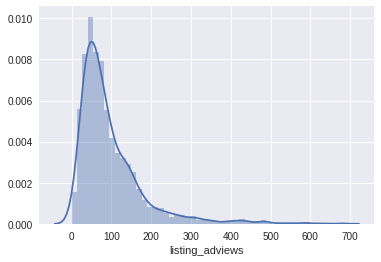

In [16]:
sns.distplot(data['listing_adviews'][data['mobile_brand'] == 1])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


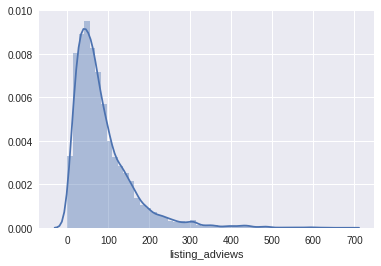

In [17]:
sns.distplot(data['listing_adviews'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


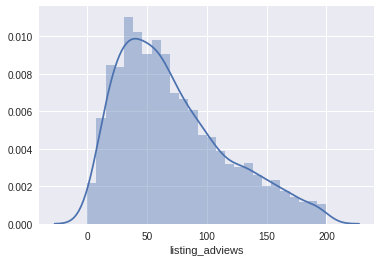

In [18]:
sns.distplot(data['listing_adviews'][data['listing_adviews'] <= 200])

In [0]:
#data=data[data['listing_adviews'] <= 300]

In [20]:
data['listing_adviews'].max()

680.0

In [0]:
def f(row):
  adviews = row['listing_adviews']
  if(adviews <= 50):
    return 0
  else:
    return 1

data['labeled'] = data.apply(f, axis=1)

In [0]:
models = data['mobile_model'].unique()

In [0]:
price_means = {}
for model in models:
  price_means[model] = data['price'][data['mobile_model'] == model].mean()

In [0]:
def convert_price(row):
  price = row['price']
  model = row['mobile_model']
  return price / price_means[model]

data['price'] = data.apply(convert_price, axis=1)

In [0]:
data_sorted = data.sort_values(['listing_adviews'], ascending=1)

In [26]:
data_sorted.head()

,subject,price,mobile_model,area,condition_ad,elt_condition,mobile_capacity,mobile_type,elt_warranty,mobile_brand,elt_lock,listing_adviews,day_of_week,hour,labeled
3145,Apple iPhone XS Max 64 GB vàng,1.083397,593,105,1.0,1.0,5.0,1,2.0,1,0.0,0.0,2,11,0
4119,Xiaomi Mi Mix 3 2 sim hàng cty Digiworld bh 10th,5.781293,151,105,0.0,2.0,6.0,1,2.0,15,0.0,0.0,6,12,0
2512,Samsung Galaxy S7 Active,0.554748,42,105,1.0,2.0,4.0,1,0.0,2,0.0,0.0,1,15,0
25,Iphone 7 plus 128 GB Đỏ,1.412138,12,96,1.0,2.0,6.0,1,2.0,1,0.0,0.0,2,16,0
928,Iphone 6s plus quốc tế 16gb máy đẹp 98%,1.058569,10,109,0.0,2.0,3.0,1,2.0,1,0.0,0.0,0,10,0


In [0]:
data = data.drop(columns=['listing_adviews'])

In [0]:
data_final = pd.get_dummies(data, columns=['day_of_week', 'hour', 'mobile_model', 'condition_ad', 'area', 'elt_condition', 'mobile_capacity', 'mobile_type', 'elt_warranty', 'mobile_brand', 'elt_lock'])
#data_final = data

In [29]:
data_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 4386
Data columns (total 391 columns):
subject                object
price                  float64
labeled                int64
day_of_week_0          uint8
day_of_week_1          uint8
day_of_week_2          uint8
day_of_week_3          uint8
day_of_week_4          uint8
day_of_week_5          uint8
day_of_week_6          uint8
hour_0                 uint8
hour_1                 uint8
hour_2                 uint8
hour_3                 uint8
hour_4                 uint8
hour_5                 uint8
hour_6                 uint8
hour_7                 uint8
hour_8                 uint8
hour_9                 uint8
hour_10                uint8
hour_11                uint8
hour_12                uint8
hour_13                uint8
hour_14                uint8
hour_15                uint8
hour_16                uint8
hour_17                uint8
hour_18                uint8
hour_19                uint8
hour_20            

# Prepare For Trainging

**Prepare Train Test Dataset**

In [0]:
#data = data_final.drop(columns=['subject'])
pos = data_final.columns.get_loc('labeled')
y = data_final['labeled']
X = data_final.iloc[:, :pos].join(data_final.iloc[:, pos + 1:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [31]:
X_train.head()

,subject,price,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_0,...,mobile_brand_21,mobile_brand_22,mobile_brand_23,mobile_brand_24,mobile_brand_25,mobile_brand_28,mobile_brand_29,elt_lock_0.0,elt_lock_1.0,elt_lock_2.0
3409,Xiaomi Mi A1 64 GB đen 99%,0.918033,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3367,Samsung Galaxy J7 Plus Đen nhám - Jet black,0.809818,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3172,Apple iPhone 7 plus Vàng hồng zin chưa bung 128gb,1.167516,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1903,SS Samsung Galaxy S8 Plus + 64GB hình máy chi ...,0.787076,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4008,XZ Premium 2 sim deepsea black công ty fullbox,0.947189,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Clean up Text data**

In [0]:
from urllib.request import urlopen
response = urlopen('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt')
stopwords = response.read()
stopwords = stopwords.decode('utf8').split('\n')

In [0]:
import re
from bs4 import BeautifulSoup

def clean_up_text(raw_text):
  # 1. Remove HTML
  raw_text = BeautifulSoup(raw_text).get_text()
  # 2. Remove all speccial character only keep %
  letters_only = re.sub("([^a-zA-Z À-ỹ])", " ", raw_text)
  # letters_only = re.sub("\w*\d\w*", "", letters_only)
  # 3. Remove % if it doesn't stand right after a number.
  # 4. Convert to lower case and split into individual words
  words = letters_only.lower().split()
  # 5. Remove stop words
  meanful_words = [w for w in words if w not in stopwords]
  # 6. Join the words back into one string separated by space and return the 
  # result
  return meanful_words

In [0]:
# clean_train_subjects = []
# for text in X_train['subject']:
#   clean_train_subjects.append(clean_up_text(text))
# X_train = X_train.drop(columns=['subject'])

In [0]:
# clean_test_subjects = []
# for text in X_test['subject']:
#   clean_test_subjects.append(clean_up_text(text))
# X_test = X_test.drop(columns=['subject'])

**Craete Features from TFIDF**

In [0]:
tfidf = TfidfVectorizer(stop_words=None,
                        tokenizer=clean_up_text,
                        preprocessor=None, 
                        analyzer = 'word',
                        max_features = 5000)

In [0]:
train_data_features = tfidf.fit_transform(X_train['subject'])

In [0]:
test_data_features = tfidf.transform(X_test['subject'])

In [0]:
X_train = X_train.drop(columns=['subject'])
X_test = X_test.drop(columns=['subject'])

In [0]:
X_test = np.append(X_test.values, test_data_features.toarray(), axis=1)

In [0]:
X_train = np.append(X_train.values, train_data_features.toarray(), axis=1)

In [0]:
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(train_data_features.toarray()).flatten()[::-1]

In [43]:
top_n = feature_array[tfidf_sorting][:10]
top_n

array(['akg', 'tai', 'hãng', 'samsung', 'g', 's', 'ứng', 'họat', 'hướng',
       'hạn'], dtype='<U13')

In [44]:
len(tfidf.get_feature_names())

1237

# Training

In [45]:
#clf = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#clf.fit(X_train, y_train)
forest = RandomForestClassifier(n_estimators = 100) 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
X_train.shape

(3070, 1626)

In [0]:
#predictions = clf.predict(X_test)
train_predictions = forest.predict(X_train)

In [48]:
accuracy_score(y_train, train_predictions)

1.0

In [0]:
test_predictions = forest.predict(X_test)

Accuracy: 0.7469604863221885


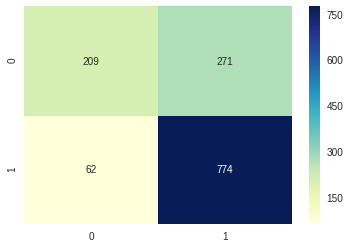

In [50]:
print ('Accuracy:', accuracy_score(y_test, test_predictions))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")